In [8]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import BolBands
from doberman import Simulation
from doberman import DoberPlot

In [9]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker, config='../config.toml.example')
stock.load_data()
stock.snip_dates('2021-01-01', '2021-12-31')

In [10]:
%%time
# Calculate Bollinger Bands signal
bb_signal = BolBands(stock)

CPU times: user 75.5 ms, sys: 3.94 ms, total: 79.4 ms
Wall time: 80.3 ms


In [11]:
%%time
# Run simulation
sim = Simulation(bb_signal.stock_obj)
sim.paper_trade()

CPU times: user 1.71 s, sys: 47.8 ms, total: 1.76 s
Wall time: 1.77 s


In [12]:
bb_signal.stock_obj.signal[bb_signal.stock_obj.signal < 0]

2021-09-21   -1.0
2021-09-30   -1.0
dtype: float64

In [13]:
sim.calc_pnl()

spy simulation PnL: $101,021


In [14]:
doberplot = DoberPlot(stock)

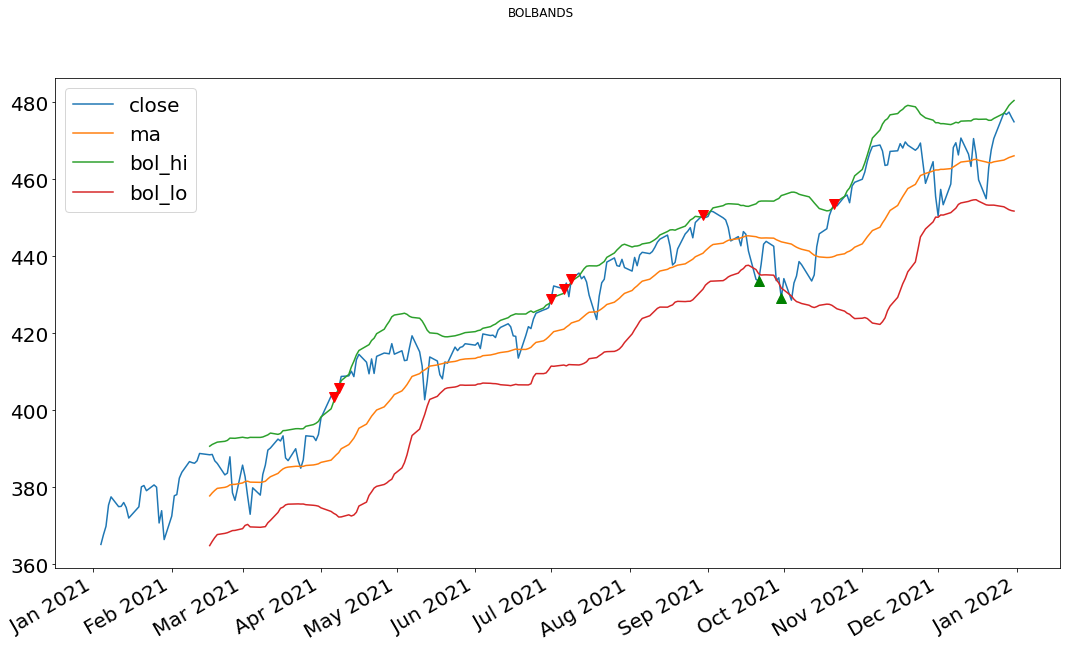

In [15]:
doberplot.order_signal(strategy_name='bolbands')